# **Project 1**
**Group 3 members: Natnael Mekuria, Yunting Chiu, Zehao Yu**

Description of the project:

This is a unified project and all groups require to work together and answer the questions at the end of each question. Some of the questions require exploring in different sources and conversation among team members. After collecting all the answers and explanations, you need to collect a unified summary and provide a report about your observations about the companies and organizations using operations management techniques and strategies. Only one copy by the group representative is required due to submission. Please submit one WORD copy for answering the questions and one .py file containing all Python codes. No page limit or format is imposed. Try your best to submit a professional and comprehensive report.


# **Problem 1: Weather Forecast:**
Suppose that whether or not it rains today depends on previous weather conditions through the last two days. Specifically, suppose that if it has rained for the past two days, then it will rain tomorrow with probability 0.7; if it rained today but not yesterday, then it will rain tomorrow with probability 0.5; if it rained yesterday but not today, then it will rain tomorrow with probability 0.4; if it has not rained in the past two days, then it will rain tomorrow with probability 0.2.

If we let the state at time n depend only on whether or not it is raining at time n, then the preceding model is not a Markov chain (why not?). However, we can transform this model into a Markov chain by saying that the state at any time is determined by the weather conditions during both that day and the previous day. In other words, we can say that the process is in

• State 0 if it rained both today and yesterday,\
• State 1 if it rained today but not yesterday,\
• State 2 if it rained yesterday but not today,\
• State 3 if it did not rain either yesterday or today.

The preceding would then represent a four-state Markov chain having a transition probability matrix

Answer the following questions:\
a) Calculate the proportion of days that it rains.\
b) If it rains today, what is the probability that a it also rains tomorrow?\
c) If it rains on Monday, what is the probability that it is sunny on Wednesday?\
d) If it rains on Monday, what is the chance it also rains on three consecutive days (Tuesday, Wednesday, and Thursday)?


### Discussion Questions:
e) If you are a weather forecast manager, do you think the Markov Chains method alone is enough in predicting the weather? What other factors should have been taken into account for better predictions? How do you think the probability data in the matrix above (P) can be obtained?

No, using Markov Chains alone is not enough to predict the weather. Markov chain is a stochastic model that describes a series of potential events where the probability of each event is determined solely by the previous event. In other words, the model is the lack of a forecasting factor in the expected values. We know the weather is vary, if we observe that tomorrow will have a hurricane, but today and yesterday are sunny days, do you think that tomorrow will have a 70% chance of a sunny day? Plus, as I mentioned before there were many types of weather, the model should record a more specific type of weather in a matrix, such as snowing, foggy and cloudy. Thus, we belive that the matrix of the above question needs to be complicated and add the predictive condition (such as hurricane) that can reinforce the completeness of the model.

f) Provide some variations to extend this problem and create three additional questions for the variation you just introduced. You do not need to answer the questions at this time.

- Update the transition matrix:

  a. If two days are sunny, the sunny day will be 0.9, cloudy day will be 0.1\
  b. If two days are rainy, the rainy day will be 0.7, sunny day will be 0.3\
  c. If two days are cloudy, the sunny day will be 0.5, rainy day will be 0.5\
  d. Otherwise, the day will be cloudy

| Yesterday      | Today         |
| ------------- |:-------------:| 
| Sunny     | Sunny |   |
| Sunny      | Rainy     |    |
| Rainy | Sunny      |     |
| Rainy | Rainy     |     |
| Cloudy | Sunny      |     |
| Cloudy | Rainy     |     |
| Cloudy | Cloudy     |     |
| Sunny | Cloudy     |     |
| Rainy | Cloudy     |     |

- How many weeks are all sunny days in a year?
- Compared to two methods (orginal one and renewed one), provide both cons and pros for each matrix.




In [ ]:
# 1A)
import numpy as np

np.random.seed(3)

StatesData = ['r', 's']
WeatherForecasting = ['r','r']
WeatherForecastingData = []

TransitionMatrix = {
    #ty     r    s    
    'rr': [0.7, 0.3],
    'rs': [0.5, 0.5],
    'sr': [0.4, 0.6],
    'ss': [0.2, 0.8] 
}

for i in range(0, 50000):
  last2Days = ''.join(WeatherForecasting[-2:])
  TransCondition = np.random.choice(StatesData, replace = True, p=TransitionMatrix[last2Days])
  WeatherForecasting.append(TransCondition)
  WeatherForecastingData.append(0 if TransCondition == 's' else 1)

print(sum(WeatherForecastingData) / len(WeatherForecastingData) * 100, '% is the probability of it raining.')


40.196 % is the problisy of it raining.


In [ ]:
# 1B)

import numpy as np

np.random.seed(3)

StatesData = ['r', 's']
WeatherForecasting = ['r','r']
WeatherForecastingData = []

TransitionMatrix = {
    #ty     r    s    
    'rr': [0.7, 0.3],
    'rs': [0.5, 0.5],
    'sr': [0.4, 0.6],
    'ss': [0.2, 0.8] 
}

for i in range(0, 50000):
  last2Days = ''.join(WeatherForecasting[-2:])
  TransCondition = np.random.choice(StatesData, replace=True, p=TransitionMatrix[last2Days])
  if(WeatherForecasting[-1] == 'r'): WeatherForecastingData.append(1 if TransCondition == 'r' else 0)
  WeatherForecasting.append(TransCondition)

print(sum(WeatherForecastingData) / len(WeatherForecastingData) * 100, '% is the problisy of it raining today if it rains tomorrow.')

57.31913623246094 % is the problisy of it raining today if it rains tomorrow.


1c)

we need to find the probability of sunny Wednesday knowing Monday is rainy

MR[TR[WR,WS],TS[WR,WS]] 

We need to find WR = MR * MR-TR * MR-TR-WS + MR * MR-TS * MR-TS-WS

MR = 1 

Because of 1b) we know the probability for rains/suny tomorrow if we know raining today.

MR-TR = .5731 

MR-TS = .4268

'rr': [0.7, 0.3]

'rs': [0.5, 0.5]

'sr': [0.4, 0.6]

'ss': [0.2, 0.8] 

MR-TR-WS = .3

MR-TS-WS = .5

1 * .5731 * .3 + 1 * .4268 * .5 = 0.38533

If it rainson Monday, the probability that it is sunny on Wednesday is 38.533%


In [ ]:
# 1c code)
import numpy as np

np.random.seed(3)

StatesData = ['r', 's']
WeatherForecasting = ['r','r']

TransitionMatrix = {
    #ty     r    s    
    'rr': [0.7, 0.3],
    'rs': [0.5, 0.5],
    'sr': [0.4, 0.6],
    'ss': [0.2, 0.8] 
}

for i in range(0, 50000):
  last2Days = ''.join(WeatherForecasting[-2:])
  TransCondition = np.random.choice(StatesData, replace=True, p=TransitionMatrix[last2Days])
  WeatherForecasting.append(TransCondition)

l = 0
v = 0

for i in range(0, 50000 - 3):
  if(WeatherForecasting[i] == 'r'):
    l += 1
    if(WeatherForecasting[i+2] == 's'):
      v += 1

print('If it rainson Monday, the probability that it is sunny on Wednesday is', v/l)



If it rainson Monday, the probability that it is sunny on Wednesday is 0.3842862118724188


1d)

MR * TUR * WR * THR = answer

MR = 1

TUR = .5731 becuase of 1B

WR and THR = .7 becuase of -> RR => [R -> 0.7, S -> 0.3]

MR * TUR * WR * THR = 1 * .5731 * .7 * .7 = 0.280819 or 28.08%


In [ ]:
# 1d code)
import numpy as np

np.random.seed(3)

StatesData = ['r', 's']
WeatherForecasting = ['r','r']

TransitionMatrix = {
    #ty     r    s    
    'rr': [0.7, 0.3],
    'rs': [0.5, 0.5],
    'sr': [0.4, 0.6],
    'ss': [0.2, 0.8] 
}

for i in range(0, 50000):
  last2Days = ''.join(WeatherForecasting[-2:])
  TransCondition = np.random.choice(StatesData, replace=True, p=TransitionMatrix[last2Days])
  WeatherForecasting.append(TransCondition)

l = 0
v = 0

for i in range(0, 50000 - 4):
  if(WeatherForecasting[i] == 'r'):
    l += 1
    if(len(''.join(WeatherForecasting[i:i+4]).split('s')) == 1):
      v += 1

print('If it rains on Monday, the chance it also rains on three consecutivedays (Tuesday, Wednesday, and Thursday) is', v/l)


If it rains on Monday, the chance it also rains on three consecutivedays (Tuesday, Wednesday, and Thursday) is 0.2808876946807981


# **Problem 2: Random Walk:**
Consider a Markov chain whose state space consists of the integers i = 0, ±1, ±2, . . ., and has transition probabilities given by
$$
Pi,i+1 = p = 1 − Pi,i−1, i = 0, ±1, ±2,...
$$


where 0 < *p* < 1. In other words, on each transition the process either moves one step to the right
(with probability p) or one step to the left (with probability 1 − *p*).

One colorful interpretation of this process is that it represents the wanderings of a drunken man as he walks along a straight line. Another is that it represents the winnings of a gambler who on each play of the game either wins or loses one dollar.


a) consider a gambler who starts with \$$100$ who receives \$$1$ with p = 0.4 each time he plays the game and losses \$$1$ with probability 1 – p = 0.6. Assuming that p = 0.4. Using a simulation model (in Python), calculate the probability of coming back to \$100 at least once after playing the game 10 times.\
b) Repeat part b) using p = 0.5.\
c) What is the probability that the gambler gets ruined (losing all \$$100$) after 1000 games?\
d) What is the probability that the gambler gets ruined (losing all \$$100$) at all?

Discussion Questions:\
e) Provide one more example of random walk in the real world. Add some variations to extending this problem and, accordingly, create three additional questions for the problem variation. You do not need to answer the questions at this time.




## Random Walk Theory in Finance
Burton Malkiel, an economics professor at Princeton University, 
pioneerly introduced random walk theory in his book *A Random Walk Down Wall Street* (1973). In the experiment, Malkiel had his student to create a random walk model, which we have practiced in our assignment 2. In order to make a decision on the stock price will be closed higher or closed lower on the day, the student used flip coins to determine the performance of the stock. If the coin came up heads, which means the stock would end the day higher. If the coin lands on the tails, the stock is expected to close lower. Then, the student plot the result. Malkiel then demonstrated the outcome to a stock technical analyst. The technical analyst makes buy and sell based on the patterns of the chart. Ironically, this is just a random walk model, not related to any financial analysis, but still applicable in the financial field.
### References
- Malkiel, B. G.(1973). *A random walk down Wall Street.* Norton.
- https://magoosh.com/statistics/what-is-random-walk-theory/

#### Questions:
Now, our idea is why we are not using a Random Walk model to apply in cryptocurrency marketing?

1. We know that the estimated cryptocurrency prices are unpredictable. Using random walk to predict the trend of [Bitcoin](https://www.coinbase.com/price/bitcoin) for the next 100 days (P = 0.5).

2. The bull run has persisted into 2021, if P = 0.7, what is  Bitcoin's prediction for this year (365 days)?

3. I am preparing to buy a Bitcoin in 2021. If P is 0.58, what is the best time to buy Bitcoin? Please tell me the specific date.

# a) p = 0.4

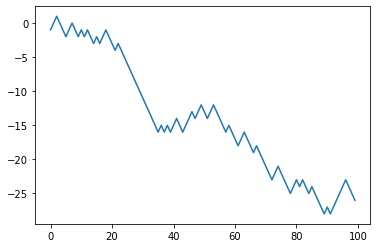

In [ ]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100):
  SlotValue = -1 if random()<(1-0.4) else 1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
plt.plot(StartValue)
plt.show()


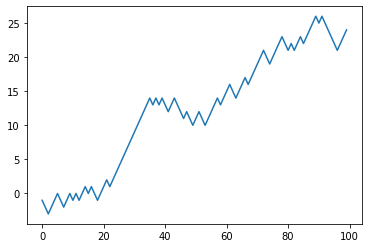

In [ ]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100):
  SlotValue = 1 if random()<(1-0.4) else -1 # change two numbers if random function less than 0.4.
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
plt.plot(StartValue)
plt.show()


# b) Repeat it. p = 0.5

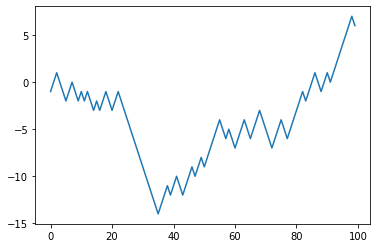

In [ ]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100):
  SlotValue = -1 if random()<0.5 else 1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
plt.plot(StartValue)
plt.show()

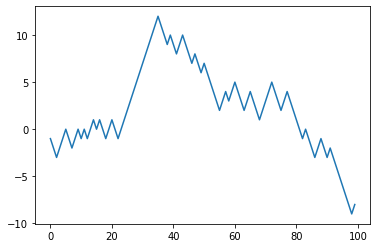

In [ ]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100):
  SlotValue = 1 if random()<0.5 else -1 # change two numbers if random function less than 0.5.
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
plt.plot(StartValue)
plt.show()

# c) p = 0.5

10000 times.

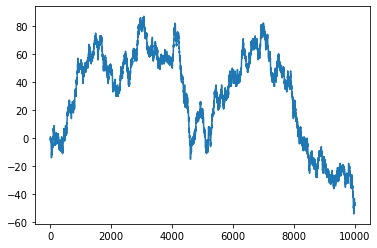

In [1]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 10000): # change a num
  SlotValue = -1 if random()<0.5 else 1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
  if ProfitValue == -100:
    print(f"the gamblers will lose $100 when the number of gamble is:", i)
  else:
    pass
plt.plot(StartValue)
plt.show()

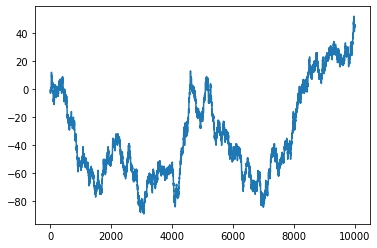

In [2]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 10000): # change a num
  SlotValue = 1 if random()<0.5 else -1 # change two numbers if random function <0.5
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
  if ProfitValue == -100:
    print(f"the gamblers will lose $100 when the number of gamble is:", i)
  else:
    pass
plt.plot(StartValue)
plt.show()

## d) p = 0.4

1000 times.

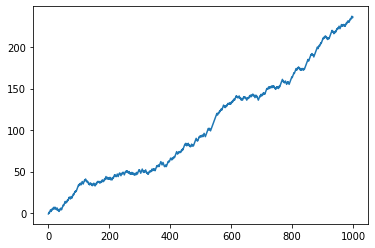

In [4]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 1000): # change a num
  SlotValue = -1 if random()<0.4 else 1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
if ProfitValue == -100:
  print(f"the gamblers will lose $100 when the number of gamble is:", i)
else:
  pass
plt.plot(StartValue)
plt.show()

the gamblers will lose $100 when the number of gamble is: 521


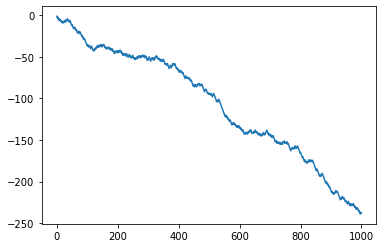

In [ ]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 1000): # change a num
  SlotValue = 1 if random()<0.4 else -1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
  if ProfitValue == -100:
    print(f"the gamblers will lose $100 when the number of gamble is:", i)
plt.plot(StartValue)
plt.show()

#P=0.5

the gamblers will lose $100 when the number of gamble is: 97377
the gamblers will lose $100 when the number of gamble is: 97379
the gamblers will lose $100 when the number of gamble is: 97381
the gamblers will lose $100 when the number of gamble is: 97383
the gamblers will lose $100 when the number of gamble is: 97385
the gamblers will lose $100 when the number of gamble is: 97557
the gamblers will lose $100 when the number of gamble is: 97561
the gamblers will lose $100 when the number of gamble is: 97563
the gamblers will lose $100 when the number of gamble is: 97571
the gamblers will lose $100 when the number of gamble is: 97591
the gamblers will lose $100 when the number of gamble is: 97597
the gamblers will lose $100 when the number of gamble is: 97601
the gamblers will lose $100 when the number of gamble is: 97603
the gamblers will lose $100 when the number of gamble is: 97605
the gamblers will lose $100 when the number of gamble is: 97623
the gamblers will lose $100 when the num

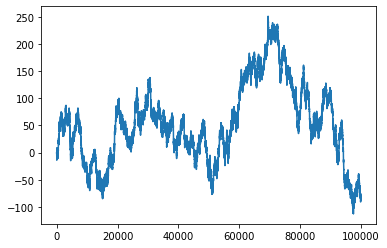

In [12]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100000): # change a num
  SlotValue =-1 if random()<0.5 else 1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
  if ProfitValue == -100:
    print(f"the gamblers will lose $100 when the number of gamble is:", i)
plt.plot(StartValue)
plt.show()

the gamblers will lose $100 when the number of gamble is: 20229
the gamblers will lose $100 when the number of gamble is: 20265
the gamblers will lose $100 when the number of gamble is: 20423
the gamblers will lose $100 when the number of gamble is: 20425
the gamblers will lose $100 when the number of gamble is: 20427
the gamblers will lose $100 when the number of gamble is: 20429
the gamblers will lose $100 when the number of gamble is: 20431
the gamblers will lose $100 when the number of gamble is: 20433
the gamblers will lose $100 when the number of gamble is: 20437
the gamblers will lose $100 when the number of gamble is: 20441
the gamblers will lose $100 when the number of gamble is: 20443
the gamblers will lose $100 when the number of gamble is: 20451
the gamblers will lose $100 when the number of gamble is: 26215
the gamblers will lose $100 when the number of gamble is: 26217
the gamblers will lose $100 when the number of gamble is: 26219
the gamblers will lose $100 when the num

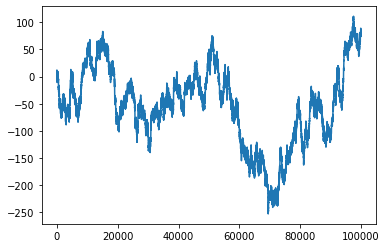

In [11]:
from random import random
import matplotlib.pyplot as plt
from random import seed
seed(1)
StartValue = list()
StartValue.append(-1 if 0<random()<0.5 else 1)
for i in range(1, 100000): # change a num
  SlotValue = 1 if random()<0.5 else -1
  ProfitValue = StartValue[i-1]+SlotValue
  StartValue.append(ProfitValue)
  if ProfitValue == -100:
    print(f"the gamblers will lose $100 when the number of gamble is:", i)
plt.plot(StartValue)
plt.show()